## Transformaciones de datos para Data Augmentation

### Imports

In [3]:
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

### DataSet Class

In [4]:
class MNIST_dataset(Dataset):
    def __init__(self, transform=None):

        print("\nLoading MNIST Dataset...")
        self.transform = transform
        self.data = torchvision.datasets.MNIST('.data/', train=False, download=True)
        print("\tTotal Len.: ", len(self.data), "\n", 50*"-")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):

        # Image
        image = self.data[idx][0]
        image = self.transform(image)
        # image = image.view(-1)

        # Label
        label = self.data[idx][1]
        # label = F.one_hot(label, num_classes=10).float()

        return {"idx": idx, "img": image, "label": label}

### Definición del Data Augmentation

In [5]:
import random

def rand_func():
    if random.random() < 0.5:
        return transforms.ElasticTransform(alpha=110.0)
    else:
        return transforms.RandomRotation(0)

test_transform = transforms.Compose(
                    [
                    transforms.RandomRotation((-15, 10)),
                    transforms.RandomAffine(degrees=2, translate=(0.02,0.01), scale=(0.9, 1.1)),
                    rand_func(),
                    transforms.GaussianBlur(kernel_size=3),
                    transforms.RandomInvert(),
                    transforms.ToTensor()
                    ])

### Obtención de los datos

In [6]:
test_dataset = MNIST_dataset(transform=test_transform)
batch_size = 100
test_dataloader = DataLoader(test_dataset, batch_size, shuffle=False)


Loading MNIST Dataset...
	Total Len.:  10000 
 --------------------------------------------------


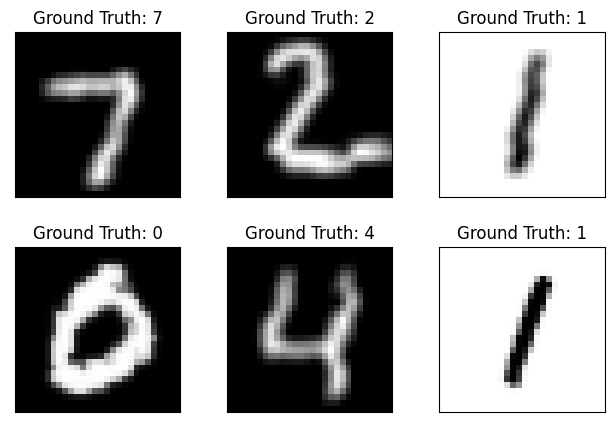

In [7]:
import matplotlib.pyplot as plt

examples = enumerate(test_dataloader)
_, example = next(examples)

# Plot the example image
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example["img"][i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example["label"][i]))
    plt.xticks([])
    plt.yticks([])
plt.show()